In [7]:
imports_path = ".\\imports.ipynb"
tableGAN_path = ".\\tableGAN.ipynb"
utils_path = ".\\utils.ipynb"

%run "$imports_path"

In [8]:
%run "$utils_path"
%run "$tableGAN_path"

image_dir = ".\\Images"
model_dir = ".\\Model\\tableGAN_ckpt\\compare_pred_on_synthetic_adult\\"
dataset_dir = ".\\Datasets\\"
dataset_train_path = os.path.join(dataset_dir, "df_adult_edited_train.csv")
dataset_test_path = os.path.join(dataset_dir, "df_adult_edited_test.csv")
dataset_gen_dir = os.path.join(dataset_dir, "Generated_for_pred_eval_adult//")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

In [9]:
n_epochs = 40
n_critic = 10
adam_lr = 0.0002
adam_beta1 = 0.5
noise_discrete_unif_max = 0

batch_size = 500

n_synthetic_datasets = 5
n_synthetic_datasets_existing = 0

retrain = False

In [10]:
%run "$tableGAN_path"
tg = TableGAN(data_train, n_critic = n_critic, adam_lr = adam_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = False, quantile_rand_transformation = False,
             noise_discrete_unif_max = noise_discrete_unif_max)

tg_qt = TableGAN(data_train, n_critic = n_critic, adam_lr = adam_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = False,
             noise_discrete_unif_max = noise_discrete_unif_max)

tg_qtr = TableGAN(data_train, n_critic = n_critic, adam_lr = adam_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max)

# data_train_changed_dtypes = data_train.copy()
# data_train_changed_dtypes = data_train_changed_dtypes.astype({"capital.gain" : float, "capital.loss" : float})
# tg_qt_dtype = TableGAN(data_train_changed_dtypes, n_critic = n_critic, adam_lr = adam_lr, adam_beta1 = adam_beta1,
#               quantile_transformation_int = True, quantile_rand_transformation = False,
#              noise_discrete_unif_max = noise_discrete_unif_max) 

In [11]:
if retrain:
    generate_multiple_datasets(tg, dataset_gen_dir, n_synthetic_datasets, n_epochs, subfolder = "tabGAN",
                              n_synthetic_datasets_existing=n_synthetic_datasets_existing)

In [12]:
if retrain:
    generate_multiple_datasets(tg_qt, dataset_gen_dir, n_synthetic_datasets, n_epochs, subfolder = "tabGAN-qt",
                              n_synthetic_datasets_existing=n_synthetic_datasets_existing)

In [13]:
if retrain:
        generate_multiple_datasets(tg_qt_dtype, dataset_gen_dir, n_synthetic_datasets, n_epochs, subfolder = "tabGAN-qt_changed_dtype",
                                  n_synthetic_datasets_existing=n_synthetic_datasets_existing)

In [14]:
if retrain:
    generate_multiple_datasets(tg_qtr, dataset_gen_dir, n_synthetic_datasets, n_epochs, subfolder = "tabGAN-qtr",
                              n_synthetic_datasets_existing=n_synthetic_datasets_existing)

In [16]:
subfolders = ["tabGAN", "tabGAN-qt", "tabGAN-qtr", "TGAN", "CTGAN", "tabFairGAN", "tabFairGAN-mod"]
efficacy_table_10_epochs = evaluate_tabGAN_through_prediction(data_train, data_test, dataset_gen_dir,
                                                              subfolders, n_synthetic_datasets = 10,
                                                             name_true_train_dataset="Original dataset")
efficacy_table_10_epochs

  0%|          | 0/71 [00:00<?, ?it/s]

,Dataset,Test Accuracy,Test AUC,SD Accuracy,SD AUC
0,Original dataset,0.865803,0.922143,0,0
1,tabGAN,0.827264,0.875581,0.00607,0.003768
2,tabGAN-qt,0.822005,0.87225,0.003517,0.003439
3,tabGAN-qtr,0.822019,0.871999,0.002473,0.003072
4,TGAN,0.812882,0.854884,0.008462,0.012246
5,CTGAN,0.825066,0.872641,0.004612,0.002787
6,tabFairGAN,0.809064,0.848356,0.005419,0.005697
7,tabFairGAN-mod,0.819489,0.868218,0.00264,0.003226


In [5]:
n_synthetic_datasets_existing = 5
n_synthetic_datasets = 10
retrain = True
if retrain:
    dataset_dir_ctgan = os.path.join(dataset_gen_dir, "CTGAN") 
    os.makedirs(dataset_dir_ctgan, exist_ok = True)
    for i in tqdm(range(n_synthetic_datasets_existing, n_synthetic_datasets), desc = "Generated datasets"):
        ctgan = CTGANSynthesizer(epochs=n_epochs, discriminator_steps=n_critic)
        ctgan.fit(data_train, tg.columns_discrete)
        fake_train = ctgan.sample(data_train.shape[0])
        fake_train.to_csv(os.path.join(dataset_dir_ctgan, f"gen{i}.csv"))
        del ctgan
retrain = False

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

In [31]:
%run "$utils_path"
subfolders = ["tabGAN", "tabGAN-qt", "tabGAN-qtr", "TGAN", "CTGAN", "tabFairGAN", "tabFairGAN-mod"]
efficacy_table_10_epochs = evaluate_tabGAN_through_prediction(data_train, data_test, dataset_gen_dir,
                                                              subfolders, n_synthetic_datasets = 10,
                                                             name_true_train_dataset="Original dataset",
                                                              eval_sd_true_dataset = True)
efficacy_table_10_epochs

  0%|          | 0/80 [00:00<?, ?it/s]

,Dataset,Test Accuracy,Test AUC,SD Accuracy,SD AUC
0,Original dataset,0.865803,0.922143,0.0,0.0
1,tabGAN,0.827264,0.875581,0.00607,0.003768
2,tabGAN-qt,0.822005,0.87225,0.003517,0.003439
3,tabGAN-qtr,0.822019,0.871999,0.002473,0.003072
4,TGAN,0.812882,0.854884,0.008462,0.012246
5,CTGAN,0.825066,0.872641,0.004612,0.002787
6,tabFairGAN,0.809064,0.848356,0.005419,0.005697
7,tabFairGAN-mod,0.819489,0.868218,0.00264,0.003226


In [23]:
print(efficacy_table_10_epochs.to_latex(index=False))

\begin{tabular}{lllll}
\toprule
         Dataset & Test Accuracy &  Test AUC & SD Accuracy &    SD AUC \\
\midrule
Original dataset &      0.865803 &  0.922143 &           0 &         0 \\
          tabGAN &      0.827264 &  0.875581 &     0.00607 &  0.003768 \\
       tabGAN-qt &      0.822005 &   0.87225 &    0.003517 &  0.003439 \\
      tabGAN-qtr &      0.822019 &  0.871999 &    0.002473 &  0.003072 \\
            TGAN &      0.812882 &  0.854884 &    0.008462 &  0.012246 \\
           CTGAN &      0.825066 &  0.872641 &    0.004612 &  0.002787 \\
      tabFairGAN &      0.809064 &  0.848356 &    0.005419 &  0.005697 \\
  tabFairGAN-mod &      0.819489 &  0.868218 &     0.00264 &  0.003226 \\
\bottomrule
\end{tabular}



In [37]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer
rng = np.random.RandomState(0)
X = np.transpose([[5,6,6,8]])
qt = QuantileTransformer(n_quantiles=10, random_state=0)
qt.fit_transform(X)

array([[0. ],
       [0.5],
       [0.5],
       [1. ]])

In [32]:
(0.75 + 0.5) / 2

0.625

In [38]:
qt.references_

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [48]:
qt.inverse_transform([[0.1]])

array([[5.3]])

In [12]:
print(efficacy_table_10_epochs.to_latex())

\begin{tabular}{llllll}
\toprule
{} &              Dataset & Test Accuracy &  Test AUC & SD Accuracy &    SD AUC \\
\midrule
0 &  Adult train dataset &      0.825764 &  0.868183 &           0 &         0 \\
1 &               tabGAN &      0.809982 &  0.849922 &    0.002708 &  0.001738 \\
2 &            tabGAN-qt &      0.814475 &  0.853481 &    0.002214 &  0.002868 \\
3 &           tabGAN-qtr &      0.815206 &   0.85484 &    0.000745 &  0.001233 \\
4 &                 TGAN &      0.817131 &  0.851157 &    0.003062 &  0.003001 \\
5 &                CTGAN &      0.813524 &  0.846873 &    0.003154 &  0.002347 \\
6 &           tabFairGAN &        0.8056 &  0.837908 &    0.001732 &  0.001983 \\
7 &       tabFairGAN-mod &      0.817154 &  0.853283 &    0.002469 &  0.002326 \\
\bottomrule
\end{tabular}



In [ ]:
tabulate(efficacy_table_10_epochs, headers='keys', tablefmt='psql')

In [ ]:
for i in range(5,10):
    path = os.path.join(dataset_gen_dir, f"tabFairGAN-mod//gen{i}.csv")
    data_temp = pd.read_csv(path)
    data_temp.to_csv(path)

In [13]:
print("Adam learning rate:", adam_lr)
%run "$utils_path"
%run "$tableGAN_path"
tg_qt = TableGAN(data_train, n_critic = n_critic, adam_lr = adam_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = False,
             noise_discrete_unif_max = noise_discrete_unif_max,
                gumbel_temperature = 0.5)

dataset_epochs_comparison_dir = os.path.join(dataset_gen_dir, "epoch_comparison")
n_epochs_vec = np.arange(1, 26, 1).tolist() + np.arange(30, 101, 5).tolist()
path_finished_epochs_counter = ".//Python_objects//existing_n_epochs_tracker.pkl"
n_synthetic_datasets_epochs_comparison = 5

Adam learning rate: 0.0002


Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch subfolder creation:   0%|          | 0/31 [00:00<?, ?it/s]

Progress training from epoch 0 to 10:   0%|          | 0/10 [00:00<?, ?it/s]

KeyboardInterrupt: 

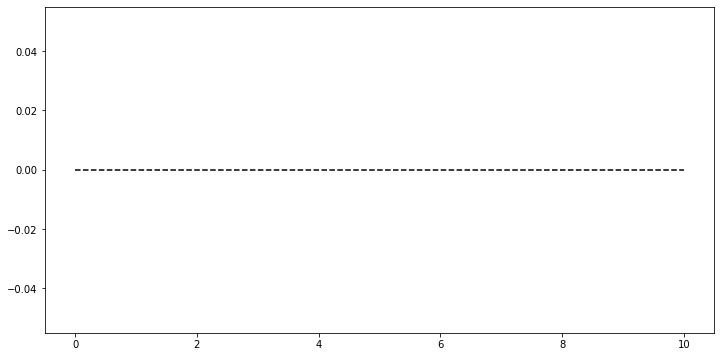

In [11]:
generate_multiple_datasets_for_multiple_epochs_fast(tg_qt, dataset_dir = dataset_epochs_comparison_dir,
                                               n_synthetic_datasets = n_synthetic_datasets_epochs_comparison,
                                                    n_epochs_vec = n_epochs_vec,
                                              path_finished_epochs_counter = path_finished_epochs_counter,
                                              redo_n_epochs_vec=[], restart = False)

  0%|          | 0/200 [00:00<?, ?it/s]

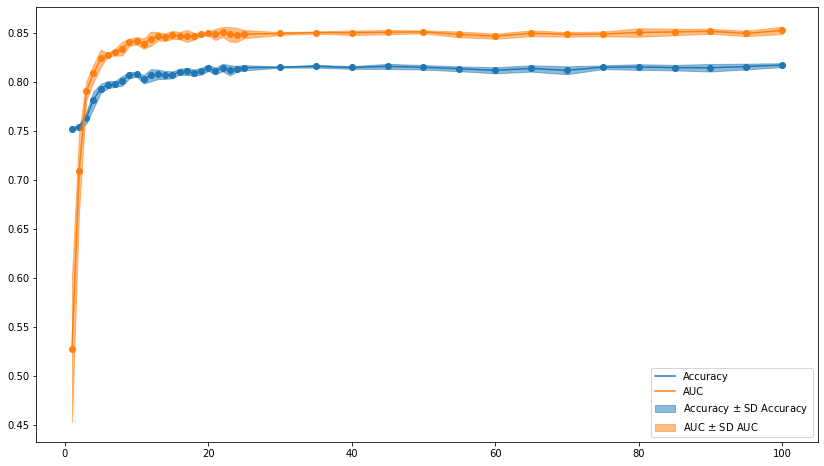

In [14]:
result = evaluate_n_epochs_through_prediction(data_train, data_test, dataset_dir = dataset_epochs_comparison_dir,
                                     n_epochs_vec = n_epochs_vec, n_synthetic_datasets = n_synthetic_datasets_epochs_comparison,
                                    save_dir = image_dir, save_path = "predictive_performance_against_n_epochs.svg",
                                             legend_pos="lower right")